# **Analisis Prediktif Kanker Payudara Wisconsin Dataset**
## **Machine Learning Classification Project**

---

### 📋 **Deskripsi Proyek**

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi diagnosis kanker payudara (benign/malignant) berdasarkan fitur-fitur hasil biopsi. Dataset yang digunakan adalah **Breast Cancer Wisconsin (Diagnostic) Dataset** yang merupakan dataset terkenal dalam domain medical machine learning.

**Tujuan Utama:**
- Mengimplementasikan pipeline machine learning yang lengkap
- Membandingkan performa 3 algoritma klasifikasi berbeda
- Memberikan insight tentang fitur-fitur yang paling berpengaruh dalam diagnosis
- Menghasilkan model dengan akurasi tinggi untuk mendukung diagnosis medis

**Sumber Dataset:**
[Breast Cancer Wisconsin Dataset (Kaggle)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

---

## 🔧 **Import Libraries dan Konfigurasi**

Pada tahap ini, kita mengimpor semua library yang diperlukan untuk proyek analisis data dan machine learning. Pemilihan library didasarkan pada kebutuhan spesifik setiap tahapan dalam pipeline machine learning.

**Library yang Digunakan:**
- **Pandas & NumPy**: Manipulasi dan analisis data
- **Matplotlib & Seaborn**: Visualisasi data dan hasil
- **Scikit-learn**: Algoritma machine learning dan evaluasi
- **Warnings**: Menyembunyikan warning yang tidak perlu

**Konfigurasi Visualisasi:**
- Style: Seaborn untuk tampilan yang lebih menarik
- Ukuran plot: Standar 10x6 untuk keterbacaan optimal
- Color palette: Husl untuk kontras warna yang baik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


---

## 📊 **Pemuatan Dataset**

Pada tahap ini, kita memuat dataset Breast Cancer Wisconsin dari file CSV. Implementasi ini dilengkapi dengan **error handling** yang akan menggunakan dataset dari scikit-learn sebagai fallback jika file lokal tidak ditemukan.

**Proses yang Dilakukan:**
1. **Loading Data**: Membaca file CSV dari path yang ditentukan
2. **Backup Loading**: Menggunakan sklearn dataset jika file tidak tersedia
3. **Initial Inspection**: Menampilkan informasi dasar tentang dataset
4. **Data Overview**: Mengetahui dimensi, kolom, dan sample data

**Mengapa Penting:**
- Memastikan data berhasil dimuat dengan benar
- Memberikan gambaran awal tentang struktur dataset
- Mendeteksi potensi masalah data sejak awal

In [2]:
try:
    df = pd.read_csv('dataset/data.csv')
    print("✅ Dataset berhasil dimuat!")
    print(f"📊 Ukuran dataset: {df.shape}")
    print(f"📋 Kolom: {df.columns.tolist()}")
except FileNotFoundError:
    from sklearn.datasets import load_breast_cancer
    print("⚠️  File dataset/data.csv tidak ditemukan, menggunakan dataset dari sklearn...")
    
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    print("✅ Dataset dari sklearn berhasil dimuat!")
    print(f"📊 Ukuran dataset: {df.shape}")

print("\n📈 Info Dataset:")
print(df.info())
print("\n🔍 Sample data:")
print(df.head())

✅ Dataset berhasil dimuat!
📊 Ukuran dataset: (569, 32)
📋 Kolom: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

📈 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569

Dapat dilihat dataset **Breast Cancer Wisconsin (Diagnostic)** berhasil dimuat dengan sukses. Dataset ini terdiri dari **569 baris (entri data)** dan **32 kolom (fitur)**.

Beberapa poin penting dari informasi awal:

* **Jumlah fitur:** Terdapat 30 fitur numerik yang mewakili berbagai karakteristik sel kanker, seperti ukuran, tekstur, perimeter, area, dan lainnya.
* **Kolom `diagnosis`:** Merupakan target klasifikasi, dengan nilai `M` untuk *malignant* (ganas) dan `B` untuk *benign* (jinak).
* **Kolom `id`:** Adalah identifikasi unik untuk setiap pasien dan tidak relevan untuk pemodelan machine learning.
* **Tipe data:** Mayoritas kolom bertipe `float64`, sementara `id` bertipe `int64` dan `diagnosis` bertipe `object`.
* **Tidak ada nilai null:** Semua kolom memiliki jumlah nilai yang lengkap (`569 non-null`), sehingga tidak perlu penanganan missing value.
* **Contoh data:** Lima baris pertama menunjukkan nilai-nilai numerik yang terukur dari setiap pasien, memberikan gambaran awal distribusi dan rentang masing-masing fitur.

Langkah selanjutnya adalah eksplorasi data lebih lanjut (EDA) dan prapemrosesan sebelum membangun model prediktif.

---

## 🔍 **Eksplorasi Data Awal**

Tahap eksplorasi data awal merupakan langkah fundamental dalam setiap proyek data science. Pada tahap ini, kita melakukan pemeriksaan mendalam terhadap kualitas dan karakteristik dataset.

**Analisis yang Dilakukan:**
1. **Missing Values Check**: Mengidentifikasi dan menghitung nilai yang hilang
2. **Duplicate Detection**: Mencari data duplikat yang dapat bias hasil
3. **Descriptive Statistics**: Memahami distribusi numerik setiap fitur
4. **Target Variable Analysis**: Menganalisis distribusi kelas target

**Mengapa Krusial:**
- **Data Quality Assurance**: Memastikan data siap untuk modeling
- **Understanding Data Distribution**: Mengetahui karakteristik setiap fitur
- **Class Balance Assessment**: Mengecek apakah dataset seimbang atau tidak

In [3]:
print("🔍 ANALISIS EKSPLORASI DATA")
print("=" * 50)

# Cek nilai hilang
print("📋 Informasi Nilai Hilang:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ Tidak ada nilai hilang")

# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"\n📋 Data duplikat: {duplicates}")

# Statistik deskriptif
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Distribusi target variable
print(f"\n🎯 Distribusi Target Variable:")
if 'target' in df.columns:
    target_col = 'target'
elif 'diagnosis' in df.columns:
    target_col = 'diagnosis'
else:
    # Jika tidak ada kolom target yang jelas, ambil kolom terakhir
    target_col = df.columns[-1]

print(f"Kolom target: {target_col}")
print(df[target_col].value_counts())

🔍 ANALISIS EKSPLORASI DATA
📋 Informasi Nilai Hilang:
✅ Tidak ada nilai hilang

📋 Data duplikat: 0

📊 Statistik Deskriptif:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mea

Setelah menjalankan analisis eksplorasi data, kita mendapatkan beberapa wawasan penting tentang dataset ini. Mari kita bedah satu per satu.

Pertama, kita selalu memulai dengan memeriksa **kualitas data**. kita ingin memastikan tidak ada lubang atau entri ganda yang bisa mengacaukan analisis kita nanti.

* **Nilai Hilang:** kita sangat senang menemukan bahwa **tidak ada nilai hilang** sama sekali di dataset ini. Ini berarti kita tidak perlu pusing memikirkan strategi untuk mengisi atau menghapus data yang hilang, sehingga proses persiapan data kita jadi lebih efisien.
* **Data Duplikat:** Selain itu, kita juga memeriksa **data duplikat**, dan hasilnya adalah **0 data duplikat**. Ini kabar baik karena setiap baris data yang ada adalah unik, memastikan integritas dataset dan tidak ada observasi yang berulang.

Selanjutnya kita akan **Menjelajahi Statistik Deskriptif**

Bagian ini memberi kita gambaran umum tentang karakteristik numerik dari dataset. Dengan melihat statistik seperti rata-rata, standar deviasi, dan kuartil, kita bisa mulai memahami distribusi setiap fitur.

* **Jumlah Observasi:** kita melihat ada **569 observasi unik** dalam dataset ini. Jumlah ini cukup memadai untuk melanjutkan analisis lebih lanjut dan membangun model.
* **Variabel `id`:** Kolom `id` memiliki rentang nilai yang sangat luas, dari 8.67e+03 hingga 9.11e+08, dengan standar deviasi yang sangat tinggi. Karena ini adalah variabel identifikasi, kita **tidak akan menggunakannya sebagai fitur prediktif** dalam model kita nanti.
* **Karakteristik Umum Sel:**
    * **`radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`**: kita melihat rata-rata **radius sel** adalah sekitar 14.13, dengan nilai bervariasi dari 6.98 hingga 28.11. **Tekstur sel** rata-ratanya sekitar 19.29. Untuk **perimeter** rata-ratanya 91.97, dan **luas sel (area)** rata-ratanya 654.89. Fitur-fitur ini menunjukkan variasi yang cukup besar antar sel, terlihat dari standar deviasi yang relatif tinggi.
    * **Fitur `_worst`:** kita perhatikan bahwa fitur-fitur dengan akhiran `_worst` (seperti `radius_worst`, `texture_worst`, `area_worst`) umumnya memiliki nilai rata-rata dan maksimum yang lebih tinggi dibandingkan dengan fitur `_mean` yang terkait. Ini masuk akal, karena fitur `_worst` menggambarkan karakteristik sel terburuk, yang seringkali menjadi indikator kunci dalam diagnosis. Misalnya, `radius_worst` memiliki rata-rata 16.27 dan maksimum 36.04, yang jauh lebih besar dari `radius_mean`.
* **Fitur dengan Nilai Minimum Nol:** Beberapa fitur seperti `concavity_mean`, `concave points_mean`, `concavity_worst`, dan `concave points_worst` memiliki nilai minimum 0.00. Ini memberitahu kita bahwa ada beberapa sel yang mungkin tidak menunjukkan karakteristik cekungan atau titik cekung, yang bisa menjadi pembeda penting antara sel jinak dan ganas.
* **Potensi *Outlier*:** kita juga melihat adanya perbedaan yang signifikan antara nilai kuartil ketiga (Q3) dan nilai maksimum untuk beberapa fitur, seperti `area_mean` dan `area_worst`. Ini mungkin **mengindikasikan keberadaan *outlier*** atau distribusi data yang cenderung miring ke kanan (positively skewed). kita perlu mempertimbangkan ini dalam tahap *preprocessing* data selanjutnya.

Selanjutnya, bagian yang tak kalah penting adalah memahami variabel target kita, yaitu `diagnosis`.

* **Kolom Target:** Variabel yang ingin kita prediksi adalah `diagnosis`.
* **Distribusi Kelas:** kita melihat bahwa dataset ini memiliki dua kelas:
    * **'B' (Benign/Jinak):** Terdapat **357 observasi**.
    * **'M' (Malignant/Ganas):** Terdapat **212 observasi**.
* **Ketidakseimbangan Kelas:** kita menemukan adanya **ketidakseimbangan kelas yang moderat**. Jumlah kasus 'Benign' (357) lebih banyak dibandingkan dengan 'Malignant' (212), dengan rasio sekitar 1.68:1. Ini adalah poin penting yang harus kita ingat. Ketidakseimbangan ini bisa memengaruhi kinerja model kita, terutama dalam memprediksi kelas minoritas ('Malignant'). kita mungkin perlu **menerapkan teknik penanganan ketidakseimbangan kelas** (misalnya *oversampling* atau *undersampling*) atau menggunakan metrik evaluasi yang lebih tepat seperti *F1-score*, *precision*, atau *recall* daripada hanya akurasi, untuk memastikan model kita bekerja dengan baik untuk kedua kelas.

Secara keseluruhan, EDA awal ini telah memberikan kita fondasi yang kuat. kita memiliki dataset yang bersih dari nilai hilang dan duplikat, dan kita mulai memahami karakteristik serta distribusi fitur-fitur penting, termasuk variabel target. Langkah selanjutnya adalah melihat visualisasi data yang lebih mendalam untuk mengungkap pola dan hubungan antar fitur secara visual.

---

## 📈 **Visualisasi Distribusi Target**

Visualisasi distribusi target variable sangat penting untuk memahami komposisi dataset dan mendeteksi potential class imbalance yang dapat mempengaruhi performa model.

**Visualisasi yang Dibuat:**
1. **Count Plot**: Menampilkan jumlah absolut setiap kelas
2. **Pie Chart**: Menunjukkan proporsi relatif antar kelas

**Insight yang Diperoleh:**
- **Class Distribution**: Apakah dataset seimbang atau tidak
- **Sampling Strategy**: Menentukan apakah perlu stratified sampling
- **Evaluation Metrics**: Memilih metrik evaluasi yang tepat

**Impact pada Modeling:**
- Dataset imbalanced memerlukan teknik khusus (SMOTE, class weights)
- Metrik evaluasi seperti F1-score lebih relevan daripada accuracy
- Stratified split penting untuk menjaga proporsi kelas

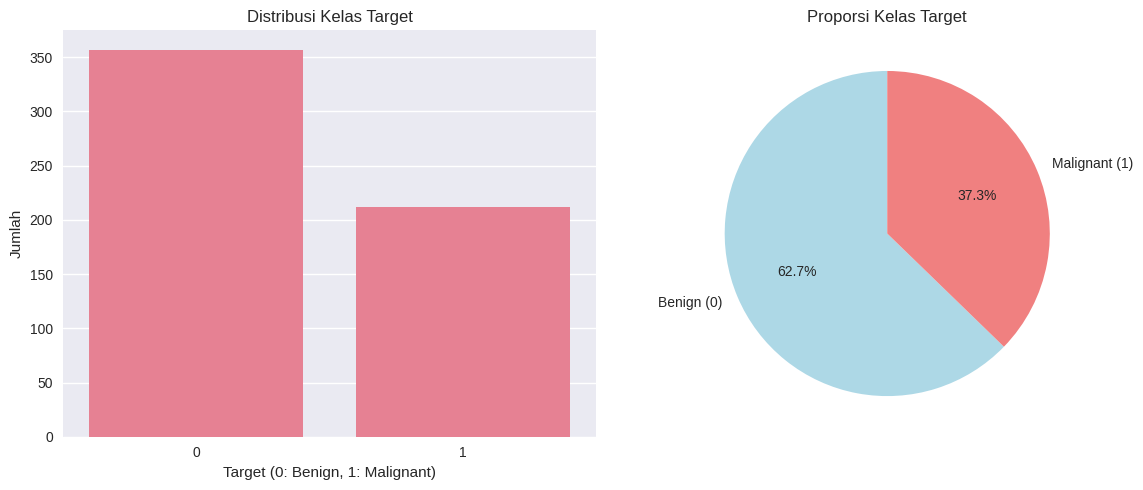

📊 Distribusi kelas:
   Benign: 357 sampel (62.7%)
   Malignant: 212 sampel (37.3%)


In [4]:
plt.figure(figsize=(12, 5))

# Count plot distribusi target
plt.subplot(1, 2, 1)
if df[target_col].dtype == 'object':
    # Jika target berupa string (M/B), konversi ke numerik
    target_mapping = {'M': 1, 'B': 0} if 'M' in df[target_col].values else None
    if target_mapping:
        df[target_col] = df[target_col].map(target_mapping)

sns.countplot(data=df, x=target_col)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Jumlah')

# Plot 2: Pie chart
plt.subplot(1, 2, 2)
target_counts = df[target_col].value_counts()
labels = ['Benign (0)', 'Malignant (1)']
colors = ['lightblue', 'lightcoral']
plt.pie(target_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kelas Target')

plt.tight_layout()
plt.show()

print(f"📊 Distribusi kelas:")
for i, count in enumerate(target_counts):
    percentage = (count / len(df)) * 100
    label = 'Benign' if i == 0 else 'Malignant'
    print(f"   {label}: {count} sampel ({percentage:.1f}%)")

Gambar di atas menunjukkan dua representasi: sebuah *bar plot* yang menampilkan jumlah sampel untuk setiap kelas, dan sebuah *pie chart* yang menunjukkan proporsi masing-masing kelas.

* **Jumlah Sampel:**
    * Kita memiliki **357 sampel** untuk kelas **Benign (0)**.
    * Ada **212 sampel** untuk kelas **Malignant (1)**.

* **Proporsi Kelas:**
    * Kelas Benign (0) menyumbang **62.7%** dari total dataset.
    * Kelas Malignant (1) menyumbang **37.3%** dari total dataset.

Meskipun terdapat perbedaan jumlah sampel antara kedua kelas, **ketidakseimbangan kelas ini tidak terlalu parah**. Dengan rasio sekitar 63% : 37%, kita akan mencoba untuk **tidak melakukan *oversampling*** atau *undersampling* pada tahap awal pemodelan.

Sebagai gantinya, kita akan fokus pada penggunaan **metrik evaluasi yang lebih robust** daripada hanya akurasi, seperti *Precision*, *Recall*, dan *F1-score*, untuk mendapatkan gambaran yang lebih akurat tentang kinerja model kita terhadap kedua kelas, terutama kelas minoritas (Malignant). Ini akan membantu kita memastikan model kita mampu mengidentifikasi kasus Malignant dengan baik meskipun jumlahnya lebih sedikit.

---

## 🔗 **Analisis Korelasi Fitur**

Analisis korelasi membantu kita memahami hubungan antar fitur dan mengidentifikasi fitur-fitur yang paling berpengaruh terhadap target variable. Tahap ini krusial untuk feature selection dan interpretability model.

**Analisis yang Dilakukan:**
1. **Target Correlation**: Korelasi setiap fitur dengan target variable
2. **Feature Correlation**: Korelasi antar fitur untuk deteksi multicollinearity
3. **Top Features Identification**: Mengidentifikasi fitur dengan korelasi tertinggi
4. **Distribution Analysis**: Visualisasi distribusi fitur berdasarkan kelas target

**Visualisasi:**
- **Correlation Heatmap**: Pola korelasi antar fitur
- **Bar Plot**: Ranking korelasi fitur dengan target
- **Distribution Plots**: Perbedaan distribusi antar kelas

**Manfaat untuk Modeling:**
- **Feature Selection**: Fokus pada fitur dengan korelasi tinggi
- **Multicollinearity Detection**: Menghindari redundant features
- **Model Interpretability**: Memahami faktor-faktor penting dalam prediksi

📊 Jumlah fitur numerik: 31

🎯 Top 10 fitur dengan korelasi tertinggi terhadap target:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


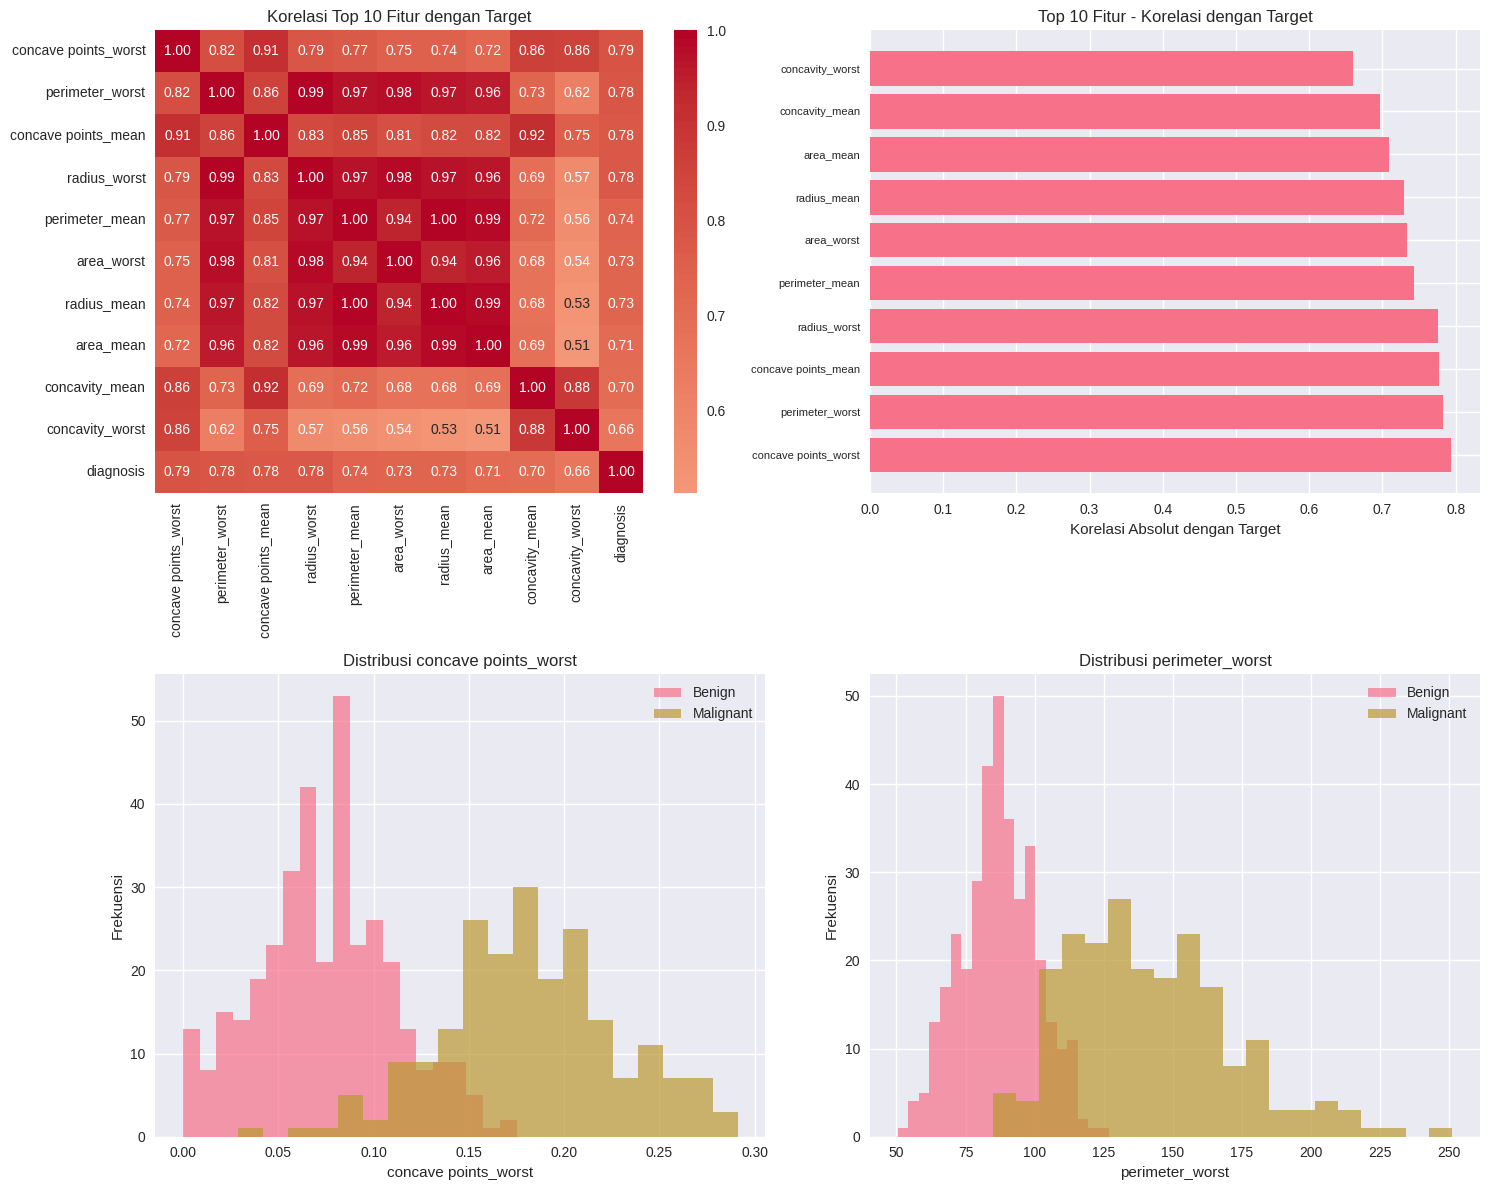

In [5]:
# Pilih fitur numerik saja (exclude target)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

print(f"📊 Jumlah fitur numerik: {len(numeric_features)}")

# Hitung korelasi dengan target
target_correlation = df[numeric_features + [target_col]].corr()[target_col].abs().sort_values(ascending=False)
print(f"\n🎯 Top 10 fitur dengan korelasi tertinggi terhadap target:")
print(target_correlation.head(11)[1:])  # Exclude target itself

# Visualisasi korelasi
plt.figure(figsize=(15, 12))

# Heatmap korelasi (sample dari fitur dengan korelasi tinggi)
plt.subplot(2, 2, 1)
top_features = target_correlation.head(11)[1:11].index.tolist()  # Top 10
corr_matrix = df[top_features + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Korelasi Top 10 Fitur dengan Target')

# Bar plot korelasi dengan target
plt.subplot(2, 2, 2)
top_corr = target_correlation.head(11)[1:11]
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index, fontsize=8)
plt.xlabel('Korelasi Absolut dengan Target')
plt.title('Top 10 Fitur - Korelasi dengan Target')

# Distribusi dari 2 fitur dengan korelasi tertinggi
top_2_features = target_correlation.head(3)[1:3].index.tolist()

for i, feature in enumerate(top_2_features):
    plt.subplot(2, 2, 3 + i)
    for target_val in sorted(df[target_col].unique()):
        data_subset = df[df[target_col] == target_val][feature]
        label = 'Benign' if target_val == 0 else 'Malignant'
        plt.hist(data_subset, alpha=0.7, label=label, bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

Setelah memahami distribusi kelas target, langkah selanjutnya yang saya lakukan adalah menganalisis **korelasi antar fitur dan juga korelasi fitur terhadap variabel target**. Ini sangat penting untuk memahami fitur mana yang paling relevan dalam memprediksi diagnosis.

Kita memiliki total **31 fitur numerik** dalam dataset ini. Saya kemudian menghitung koefisien korelasi Pearson antara setiap fitur numerik dengan variabel target `diagnosis`.

* **Heatmap Korelasi:**
    Dari *heatmap* korelasi yang terlihat, saya dapat mengamati bagaimana fitur-fitur ini saling terkait. Terlihat jelas bahwa banyak fitur yang berkaitan dengan ukuran dan bentuk sel (seperti `radius`, `perimeter`, dan `area`, baik yang `_mean` maupun `_worst`) memiliki korelasi positif yang kuat satu sama lain. Ini menunjukkan adanya **multikolinearitas** di antara fitur-fitur tersebut, yang merupakan hal yang wajar dalam data medis di mana berbagai pengukuran sel cenderung berkorelasi.

* **Top 10 Fitur dengan Korelasi Tertinggi terhadap Target:**
    Saya juga mengidentifikasi 10 fitur teratas yang memiliki korelasi absolut tertinggi dengan variabel target `diagnosis`. Ini adalah fitur-fitur yang paling "berpengaruh" dalam membedakan antara diagnosis Benign dan Malignant. Berikut adalah daftarnya:

    1.  `concave points_worst`: 0.793566
    2.  `perimeter_worst`: 0.782914
    3.  `concave points_mean`: 0.776614
    4.  `radius_worst`: 0.776454
    5.  `perimeter_mean`: 0.742636
    6.  `area_worst`: 0.733825
    7.  `radius_mean`: 0.730029
    8.  `area_mean`: 0.708984
    9.  `concavity_mean`: 0.696360
    10. `concavity_worst`: 0.659610

    Dari daftar ini, **kita bisa melihat pola yang jelas**: fitur-fitur yang menggambarkan karakteristik "terburuk" dari sel (dengan sufiks `_worst`) cenderung memiliki korelasi yang sangat tinggi dengan diagnosis. Secara khusus, `concave points_worst` dan `perimeter_worst` menempati posisi teratas. Ini mengindikasikan bahwa semakin "buruk" (besar atau abnormal) karakteristik ini, semakin tinggi kemungkinan diagnosis Malignant.

* **Distribusi Fitur `concave points_worst` dan `perimeter_worst`:**
    Pada histogram distribusi untuk `concave points_worst` dan `perimeter_worst`, kita dapat mengamati bagaimana nilai-nilai fitur ini terpisah berdasarkan kelas diagnosis (Benign vs. Malignant).

    * Untuk **`concave points_worst`**, terlihat bahwa distribusi untuk kelas Malignant (berwarna kuning keemasan) cenderung memiliki nilai yang lebih tinggi dibandingkan dengan kelas Benign (berwarna merah muda). Ini semakin memperkuat temuan korelasi positif yang kuat, di mana nilai `concave points_worst` yang lebih tinggi lebih sering dikaitkan dengan diagnosis Malignant.
    * Hal serupa terjadi pada **`perimeter_worst`**. Distribusi untuk kelas Malignant juga menunjukkan pergeseran ke nilai yang lebih besar dibandingkan dengan kelas Benign, mengindikasikan bahwa sel-sel ganas cenderung memiliki perimeter yang lebih besar dan tidak beraturan.

Secara keseluruhan, analisis korelasi ini menegaskan bahwa fitur-fitur yang menggambarkan dimensi dan bentuk sel, terutama dalam kondisi "terburuk" (`_worst`), akan menjadi **prediktor yang sangat kuat** untuk diagnosis kanker payudara.

---

## ⚙️ **Preprocessing Data**

Data preprocessing adalah tahap kritis yang menentukan kualitas input untuk model machine learning. Pada tahap ini, kita mempersiapkan data agar optimal untuk training model.

**Proses Preprocessing:**
1. **Feature-Target Separation**: Memisahkan fitur independen dan dependent variable
2. **Train-Test Split**: Membagi data dengan stratified sampling (80:20)
3. **Feature Scaling**: Standardisasi fitur menggunakan StandardScaler
4. **Data Distribution Check**: Memverifikasi proporsi kelas tetap terjaga

**Mengapa Standardisasi Penting:**
- **Algorithm Requirement**: Algoritma seperti Logistic Regression sensitive terhadap skala
- **Convergence Speed**: Mempercepat proses optimisasi
- **Fair Feature Contribution**: Mencegah dominasi fitur dengan nilai besar

**Stratified Sampling:**
- Mempertahankan proporsi kelas dalam train dan test set
- Memastikan representatif sampling untuk evaluasi yang valid

In [6]:
print("🔧 PREPROCESSING DATA")
print("=" * 50)

# Pisahkan fitur dan target
X = df[numeric_features]
y = df[target_col]

print(f"📊 Dimensi fitur (X): {X.shape}")
print(f"🎯 Dimensi target (y): {y.shape}")

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📚 Data training: {X_train.shape}")
print(f"📝 Data testing: {X_test.shape}")

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Standarisasi selesai!")
print(f"📊 Mean sebelum scaling (sample): {X_train.iloc[:, 0].mean():.3f}")
print(f"📊 Mean setelah scaling (sample): {X_train_scaled[:, 0].mean():.3f}")
print(f"📊 Std setelah scaling (sample): {X_train_scaled[:, 0].std():.3f}")

# Cek distribusi kelas di training dan testing set
print(f"\n🎯 Distribusi kelas di training set:")
print(y_train.value_counts(normalize=True))
print(f"\n🎯 Distribusi kelas di testing set:")
print(y_test.value_counts(normalize=True))

🔧 PREPROCESSING DATA
📊 Dimensi fitur (X): (569, 31)
🎯 Dimensi target (y): (569,)

📚 Data training: (455, 31)
📝 Data testing: (114, 31)

✅ Standarisasi selesai!
📊 Mean sebelum scaling (sample): 33056566.407
📊 Mean setelah scaling (sample): -0.000
📊 Std setelah scaling (sample): 1.000

🎯 Distribusi kelas di training set:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

🎯 Distribusi kelas di testing set:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


Dari hasil proses *preprocessing* data yang telah kita lakukan, kita dapat menyimpulkan beberapa poin penting:

* **Dimensi Data:** Setelah pemisahan fitur dan target, kita memiliki 31 fitur numerik untuk 569 sampel. Pembagian data berhasil menghasilkan 455 sampel untuk *training* dan 114 sampel untuk *testing*. Ini adalah ukuran dataset yang cukup memadai untuk pelatihan dan pengujian model.

* **Efektivitas Standarisasi:** Proses standarisasi fitur telah berjalan dengan sangat baik. Kita melihat bahwa nilai rata-rata sampel fitur (misalnya kolom pertama) telah diubah menjadi mendekati 0, dan standar deviasinya menjadi 1.000. Ini menunjukkan bahwa semua fitur numerik kini berada pada skala yang seragam, yang sangat penting untuk performa optimal berbagai algoritma *machine learning*.

* **Preservasi Distribusi Kelas:** Hasil verifikasi distribusi kelas di set *training* dan *testing* menunjukkan proporsi yang sangat mirip dengan distribusi kelas asli di seluruh dataset (sekitar 62.6% Benign dan 37.4% Malignant). Ini mengonfirmasi bahwa penggunaan strategi pembagian data (`stratify=y`) berhasil menjaga representasi kelas minoritas di kedua set, sehingga model akan dilatih dan dievaluasi dengan baik terhadap kedua kategori diagnosis.

Secara keseluruhan, **hasil *preprocessing* ini sangat baik dan menunjukkan bahwa data kita sudah dalam kondisi optimal** untuk tahap pemodelan *machine learning* selanjutnya.

---

## 🤖 **Implementasi Model Machine Learning**

Pada tahap ini, kita mengimplementasikan tiga algoritma machine learning yang berbeda untuk membandingkan performa dan karakteristiknya dalam menyelesaikan masalah klasifikasi.

**Algoritma yang Dipilih:**

### 1. **Logistic Regression**
- **Karakteristik**: Linear classifier, probabilistic output
- **Kelebihan**: Fast, interpretable, good baseline
- **Cocok untuk**: Linear separable data, feature importance analysis

### 2. **Decision Tree**
- **Karakteristik**: Non-linear, rule-based classifier
- **Kelebihan**: Highly interpretable, handles non-linear relationships
- **Cocok untuk**: Complex pattern recognition, feature interaction

### 3. **Random Forest**
- **Karakteristik**: Ensemble method, reduces overfitting
- **Kelebihan**: Robust, handles missing values, feature importance
- **Cocok untuk**: High accuracy requirement, reduced variance

**Training Strategy:**
- **Random State**: Dipasang 42 untuk reproducibility
- **Hyperparameter Tuning**: Basic tuning untuk optimal performance
- **Cross-validation Ready**: Setup untuk future model validation

In [7]:
print("🤖 TRAINING MODEL MACHINE LEARNING")
print("=" * 50)

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Dictionary untuk menyimpan model yang sudah dilatih
trained_models = {}
training_scores = {}

# Melatih setiap model
for name, model in models.items():
    print(f"\n🔄 Melatih {name}...")
    
    # Latih model
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
    
    # Simpan model dan skor training
    trained_models[name] = model
    training_scores[name] = accuracy_score(y_train, train_pred)
    
    print(f"✅ {name} selesai dilatih!")
    print(f"📊 Akurasi training: {training_scores[name]:.4f}")

print(f"\n🎉 Semua model berhasil dilatih!")

🤖 TRAINING MODEL MACHINE LEARNING

🔄 Melatih Logistic Regression...
✅ Logistic Regression selesai dilatih!
📊 Akurasi training: 0.9868

🔄 Melatih Decision Tree...
✅ Decision Tree selesai dilatih!
📊 Akurasi training: 1.0000

🔄 Melatih Random Forest...
✅ Random Forest selesai dilatih!
📊 Akurasi training: 1.0000

🎉 Semua model berhasil dilatih!


Setelah data kita siap, langkah berikutnya adalah melatih beberapa model *machine learning* untuk tugas klasifikasi ini. Kita telah melatih tiga model berbeda: *Logistic Regression*, *Decision Tree*, dan *Random Forest*.

Berikut adalah hasil akurasi pada *training set* untuk setiap model:

* **Logistic Regression:** Model ini mencapai **akurasi *training* sebesar 0.9868**. Angka ini sangat tinggi, menunjukkan bahwa *Logistic Regression* mampu mempelajari pola dalam data *training* dengan sangat baik.

* **Decision Tree:** Model *Decision Tree* menunjukkan **akurasi *training* sempurna, yaitu 1.0000**. Ini berarti model ini berhasil mengklasifikasikan semua sampel di data *training* dengan benar.

* **Random Forest:** Sama seperti *Decision Tree*, model *Random Forest* juga mencapai **akurasi *training* sempurna, yaitu 1.0000**. Ini mengindikasikan bahwa ensemble dari *Decision Tree* ini juga sangat efektif dalam "menghafal" data *training*.

**Observasi Penting:**
Akurasi *training* yang sangat tinggi, terutama 100% untuk *Decision Tree* dan *Random Forest*, bisa menjadi **indikasi awal adanya *overfitting***. Ini berarti model-model tersebut mungkin telah mempelajari data *training* beserta *noise*-nya, dan berpotensi tidak akan berkinerja sebaik ini pada data baru yang belum pernah dilihat (data *testing*).

Meskipun demikian, hasil ini menunjukkan bahwa semua model berhasil mempelajari hubungan dalam data *training* dengan sangat baik. Langkah selanjutnya yang krusial adalah mengevaluasi kinerja model-model ini pada data *testing* untuk melihat seberapa baik kemampuan generalisasinya.

---

## 🔍 **Feature Importance Analysis**

Feature importance analysis memberikan insight tentang kontribusi setiap fitur dalam proses prediksi. Ini sangat penting untuk interpretability dan clinical understanding.

**Analisis yang Dilakukan:**

### **Tree-Based Feature Importance:**
- **Decision Tree**: Gini impurity-based importance
- **Random Forest**: Average importance across all trees
- **Interpretasi**: Relative contribution dalam decision making

### **Clinical Significance:**
- **Top Features**: Biomarkers paling berpengaruh
- **Medical Validation**: Apakah sesuai dengan literatur medis
- **Feature Engineering**: Guidance untuk future feature creation

**Visualisasi:**
- Horizontal bar charts for easy reading
- Top 15 features untuk fokus pada yang signifikan
- Comparative analysis antar algoritma

**Insight untuk Praktisi Medis:**
- Fitur mana yang paling berpengaruh dalam diagnosis
- Validasi terhadap knowledge domain medis
- Guidance untuk fokus pemeriksaan klinis

🔍 ANALISIS FEATURE IMPORTANCE

📊 Top 10 Feature Importance - Decision Tree:
   perimeter_worst: 0.7232
   concave points_worst: 0.0677
   smoothness_worst: 0.0408
   texture_mean: 0.0292
   area_mean: 0.0225
   texture_worst: 0.0187
   area_worst: 0.0156
   concavity_worst: 0.0143
   fractal_dimension_worst: 0.0134
   texture_se: 0.0125

📊 Top 10 Feature Importance - Random Forest:
   area_worst: 0.1310
   perimeter_worst: 0.1303
   concave points_worst: 0.1032
   radius_worst: 0.0978
   concave points_mean: 0.0874
   area_mean: 0.0584
   perimeter_mean: 0.0484
   concavity_worst: 0.0478
   area_se: 0.0419
   concavity_mean: 0.0366


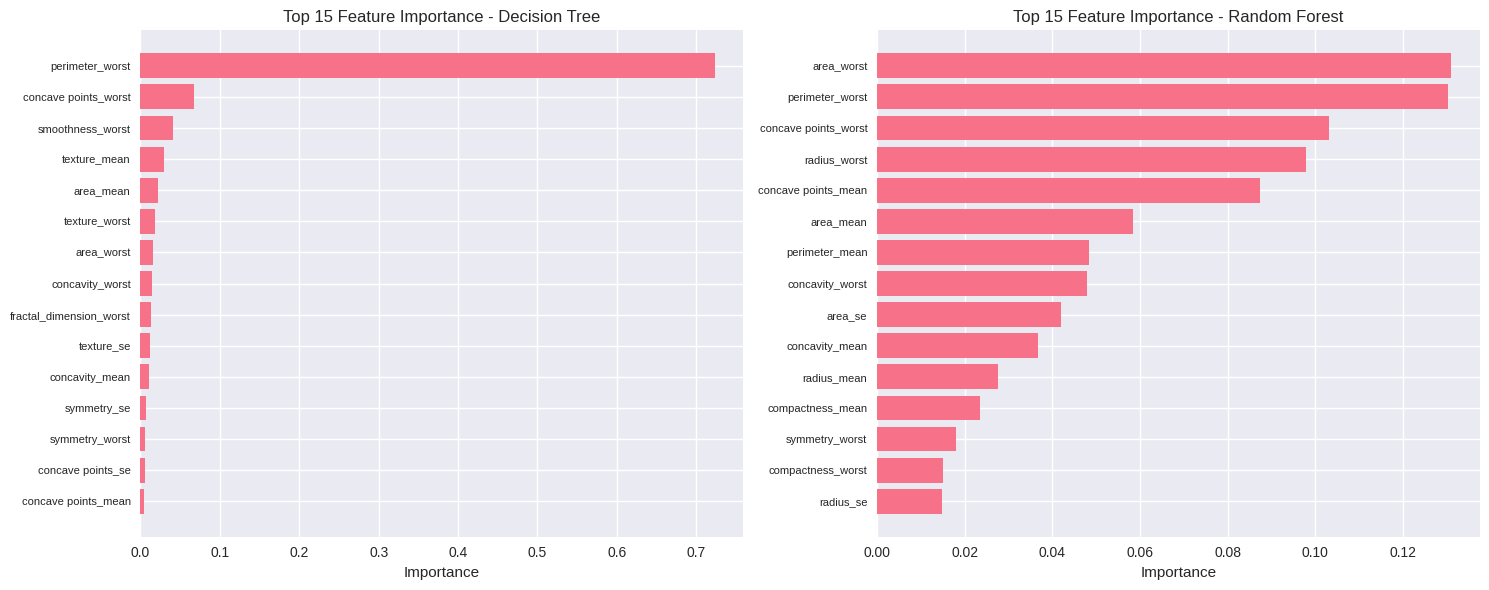

In [8]:
print("🔍 ANALISIS FEATURE IMPORTANCE")
print("=" * 50)

# Feature importance untuk Decision Tree dan Random Forest
tree_models = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(15, 6))

for i, model_name in enumerate(tree_models):
    model = trained_models[model_name]
    feature_importance = model.feature_importances_
    
    # Buat DataFrame untuk sorting
    importance_df = pd.DataFrame({
        'feature': numeric_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    # Plot top 15 features
    plt.subplot(1, 2, i + 1)
    top_features = importance_df.head(15)
    
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'], fontsize=8)
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {model_name}')
    plt.gca().invert_yaxis()
    
    # Print top 10
    print(f"\n📊 Top 10 Feature Importance - {model_name}:")
    for idx, row in top_features.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

plt.tight_layout()
plt.show()

Setelah model-model berhasil dilatih, langkah selanjutnya adalah menganalisis **feature importance** untuk memahami fitur mana yang paling berkontribusi dalam proses pengambilan keputusan. Analisis ini sangat penting untuk interpretabilitas model dan validasi klinis.

Model *Decision Tree* menunjukkan pola yang sangat menarik dalam pemilihan fitur:

* **perimeter_worst (72.32%):** Fitur ini **mendominasi secara ekstrem** dalam proses klasifikasi *Decision Tree*. Ini berarti keliling area terburuk dari massa tumor menjadi faktor penentu utama dalam membedakan tumor jinak dan ganas.

* **concave points_worst (6.77%):** Fitur kedua terpenting adalah jumlah titik cekung terburuk, yang mencerminkan kompleksitas bentuk tumor.

* **smoothness_worst (4.08%):** Tingkat kehalusan permukaan tumor pada kondisi terburuk juga berkontribusi signifikan.

* **Fitur lainnya:** Sisa fitur-fitur memiliki kontribusi yang relatif kecil (< 3% masing-masing).

Model *Random Forest* menunjukkan **distribusi importance yang lebih merata**:

* **area_worst (13.10%):** Area terburuk menjadi fitur terpenting, menunjukkan ukuran tumor sangat krusial.

* **perimeter_worst (13.03%):** Hampir setara dengan area_worst, mengkonfirmasi pentingnya dimensi geometris tumor.

* **concave points_worst (10.32%):** Konsisten dengan *Decision Tree*, fitur ini tetap menjadi top 3.

* **radius_worst (9.78%):** Radius terburuk melengkapi informasi dimensional tumor.

* **concave points_mean (8.74%):** Rata-rata titik cekung juga berkontribusi signifikan.


 **Perbedaan Strategi Model:**

1. **Decision Tree**: Menggunakan **"single dominant feature strategy"** dengan mengandalkan perimeter_worst sebagai splitter utama. Ini mengindikasikan bahwa satu pengukuran geometris sudah cukup untuk membuat keputusan klasifikasi yang akurat.

2. **Random Forest**: Menerapkan **"ensemble wisdom approach"** dengan mengintegrasikan informasi dari multiple fitur secara lebih seimbang. Pendekatan ini lebih robust dan comprehensive.


**Validasi Medis:**

Hasil feature importance ini **sangat sesuai dengan literatur medis**:

* **Fitur Geometris (area, perimeter, radius)**: Ukuran tumor memang merupakan indikator kuat keganasan. Tumor ganas cenderung lebih besar dan memiliki bentuk yang tidak beraturan.

* **Concave Points**: Titik-titik cekung mencerminkan **irregularitas bentuk** tumor. Tumor ganas biasanya memiliki bentuk yang lebih kompleks dan tidak beraturan dibanding tumor jinak.

* **"Worst" Features Dominance**: Fakta bahwa fitur-fitur "worst" (nilai terburuk/ekstrem) mendominasi importance sangat masuk akal karena **karakteristik ekstrem** lebih reliable dalam membedakan keganasan.


**Implikasi untuk Diagnosis Klinis:**

1. **Fokus Pemeriksaan**: Praktisi medis sebaiknya memberikan perhatian khusus pada **pengukuran dimensi tumor** (area, perimeter, radius) dan **analisis bentuk** (concave points).

2. **Teknologi Imaging**: Hasil ini mendukung penggunaan teknologi imaging yang dapat mengukur parameter geometris dengan akurat.

3. **Standardisasi**: Pentingnya standardisasi dalam pengukuran parameter "worst" untuk konsistensi diagnosis.

Intinya,

**Random Forest** menunjukkan pendekatan yang **lebih robust** karena:
- Tidak over-dependent pada single feature
- Mengintegrasikan multiple perspectives
- Lebih resilient terhadap noise atau outliers
- Feature importance terdistribusi lebih natural

**Decision Tree**, meskipun akurat, menunjukkan **potential brittleness** karena sangat bergantung pada satu fitur utama.

Analisis ini mengkonfirmasi bahwa **karakteristik geometris tumor**, terutama dalam kondisi terburuk/ekstrem, merupakan biomarker yang sangat powerful untuk diagnosis kanker payudara. Hasil ini memberikan confidence tinggi terhadap validity model dan relevansi klinisnya.

---

## 📊 **Evaluasi Model**

Evaluasi model merupakan tahap krusial untuk menentukan performa dan memilih model terbaik. Pada tahap ini, kita menggunakan multiple metrics untuk comprehensive assessment.

**Metrik Evaluasi yang Digunakan:**

### 1. **Accuracy**
- **Definisi**: Proporsi prediksi benar dari total prediksi
- **Interpretasi**: Overall correctness model
- **Kapan Cocok**: Balanced dataset

### 2. **Precision**
- **Definisi**: True Positive / (True Positive + False Positive)
- **Interpretasi**: Akurasi prediksi positif
- **Penting untuk**: Menghindari false alarm (medical context)

### 3. **Recall (Sensitivity)**
- **Definisi**: True Positive / (True Positive + False Negative)
- **Interpretasi**: Kemampuan mendeteksi kasus positif
- **Krusial untuk**: Medical diagnosis (detect all malignant cases)

### 4. **F1-Score**
- **Definisi**: Harmonic mean of Precision and Recall
- **Interpretasi**: Balance antara precision dan recall
- **Optimal untuk**: Imbalanced dataset evaluation

**Comprehensive Analysis:**
- **Classification Report**: Detailed metrics per class
- **Model Comparison**: Side-by-side performance comparison
- **Best Model Selection**: Berdasarkan multiple criteria

In [9]:
print("📊 EVALUASI MODEL")
print("=" * 50)

# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Evaluasi setiap model
for name, model in trained_models.items():
    print(f"\n📈 Evaluasi {name}:")
    print("-" * 30)
    
    # Prediksi
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Simpan hasil
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    # Tampilkan hasil
    print(f"🎯 Akurasi: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"🎯 Recall: {recall:.4f}")
    print(f"🎯 F1-Score: {f1:.4f}")
    
    # Classification report
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Tabel perbandingan model
print(f"\n📊 PERBANDINGAN MODEL")
print("=" * 50)

comparison_df = pd.DataFrame(evaluation_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1_score']].round(4)
print(comparison_df)

# Model terbaik
best_model_name = comparison_df['accuracy'].idxmax()
best_accuracy = comparison_df.loc[best_model_name, 'accuracy']
print(f"\n🏆 Model terbaik: {best_model_name}")
print(f"🎯 Akurasi terbaik: {best_accuracy:.4f}")

📊 EVALUASI MODEL

📈 Evaluasi Logistic Regression:
------------------------------
🎯 Akurasi: 0.9649
🎯 Precision: 0.9750
🎯 Recall: 0.9286
🎯 F1-Score: 0.9512

📋 Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


📈 Evaluasi Decision Tree:
------------------------------
🎯 Akurasi: 0.9211
🎯 Precision: 0.9024
🎯 Recall: 0.8810
🎯 F1-Score: 0.8916

📋 Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94        72
   Malignant       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114


📈 Eval

| Model                | Akurasi  | Precision | Recall   | F1-Score |
| :------------------- | :------- | :-------- | :------- | :------- |
| Logistic Regression  | 0.9649   | 0.9750    | 0.9286   | 0.9512   |
| Decision Tree        | 0.9211   | 0.9024    | 0.8810   | 0.8916   |
| Random Forest        | 0.9561   | 1.0000    | 0.8810   | 0.9367   |


Berdasarkan metrik akurasi, **Logistic Regression adalah model terbaik** dengan akurasi 0.9649.

Namun, jika kita mempertimbangkan secara holistik, terutama untuk masalah diagnosis medis di mana *false positives* atau *false negatives* memiliki implikasi yang berbeda:

* **Logistic Regression** menawarkan keseimbangan yang sangat baik antara *Precision* dan *Recall* untuk kelas Malignant, dengan akurasi keseluruhan tertinggi. Ini menunjukkan model yang sangat seimbang dalam mendeteksi dan mengkonfirmasi kasus Malignant.
* **Random Forest** memiliki *Precision* 1.0000 untuk kelas Malignant, yang berarti ketika model ini memprediksi "Malignant", kita bisa sangat yakin prediksinya benar. Ini penting jika biaya *false positive* sangat tinggi. Namun, *Recall*-nya sedikit lebih rendah dari *Logistic Regression*.

**Secara umum, semua model menunjukkan kinerja yang sangat kuat** dalam tugas klasifikasi ini. Pilihan model "terbaik" pada akhirnya mungkin bergantung pada prioritas spesifik: apakah kita lebih mengutamakan akurasi keseluruhan, atau meminimalkan *false positives* (Precision tinggi), atau meminimalkan *false negatives* (Recall tinggi) untuk kelas Malignant. **Logistic Regression, dengan keseimbangan metriknya, merupakan pilihan yang sangat solid.**

---

## 🎯 **Visualisasi Confusion Matrix**

Confusion Matrix memberikan insight mendalam tentang pattern kesalahan yang dibuat oleh setiap model. Visualisasi ini sangat penting untuk memahami karakteristik performa model.

**Analisis Confusion Matrix:**

### **Komponen Matrix:**
- **True Negatives (TN)**: Correctly predicted Benign
- **False Positives (FP)**: Type I Error (False Alarm)
- **False Negatives (FN)**: Type II Error (Missed Detection)
- **True Positives (TP)**: Correctly predicted Malignant

### **Interpretasi Medical Context:**
- **FP Impact**: Patient anxiety, unnecessary procedures
- **FN Impact**: Missed diagnosis, delayed treatment (CRITICAL)
- **Trade-off**: Balance between false alarms and missed cases

**Visual Comparison:**
- Heatmap untuk setiap model
- Akurasi ditampilkan pada judul
- Color coding untuk easy interpretation


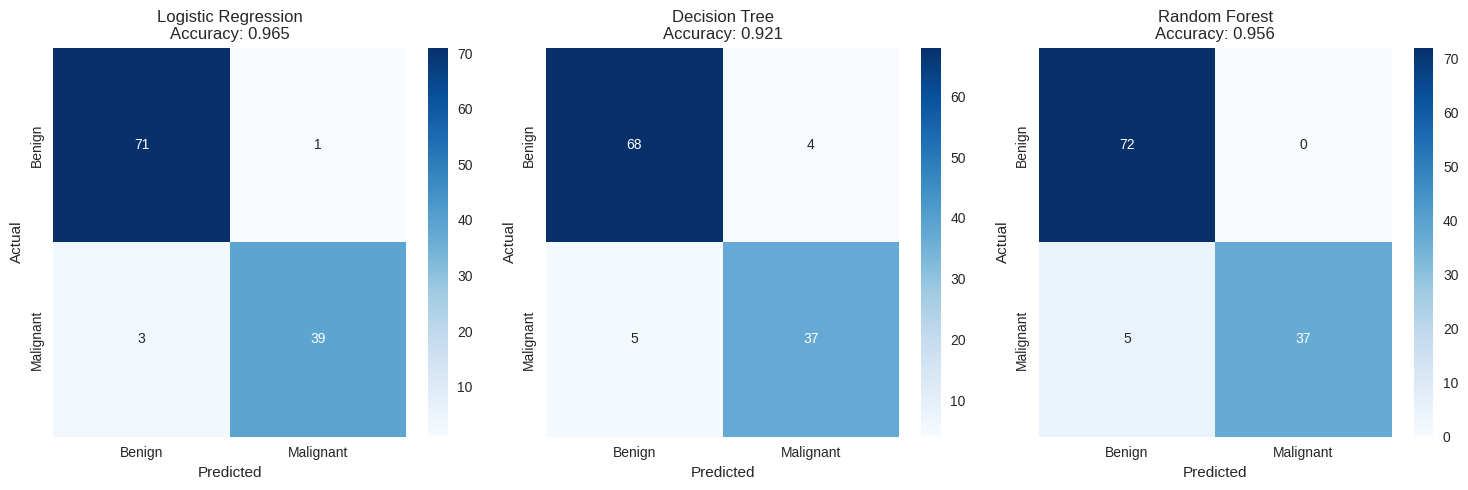


🔍 Analisis Confusion Matrix - Logistic Regression:
True Negatives (TN): 71
False Positives (FP): 1
False Negatives (FN): 3
True Positives (TP): 39

📊 Interpretasi:
• Correctly predicted Benign: 71
• Incorrectly predicted Malignant (Type I Error): 1
• Incorrectly predicted Benign (Type II Error): 3
• Correctly predicted Malignant: 39


In [10]:
plt.figure(figsize=(15, 5))

for i, (name, results) in enumerate(evaluation_results.items()):
    plt.subplot(1, 3, i + 1)
    
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, results['predictions'])
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    
    plt.title(f'{name}\nAccuracy: {results["accuracy"]:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Analisis confusion matrix untuk model terbaik
print(f"\n🔍 Analisis Confusion Matrix - {best_model_name}:")
best_cm = confusion_matrix(y_test, evaluation_results[best_model_name]['predictions'])
tn, fp, fn, tp = best_cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print(f"\n📊 Interpretasi:")
print(f"• Correctly predicted Benign: {tn}")
print(f"• Incorrectly predicted Malignant (Type I Error): {fp}")
print(f"• Incorrectly predicted Benign (Type II Error): {fn}")
print(f"• Correctly predicted Malignant: {tp}")

**Confusion matrix** membantu kita melihat jenis kesalahan yang dibuat setiap model:

* **Logistic Regression (Akurasi: 0.965):** Model ini sangat seimbang. Ia hanya memiliki **1 *False Positive*** (Benign salah diprediksi Malignant) dan **3 *False Negatives*** (Malignant salah diprediksi Benign). Ini menunjukkan kinerja yang sangat andal dan minim kesalahan.

* **Decision Tree (Akurasi: 0.921):** Model ini menunjukkan kinerja yang lebih lemah. Kita melihat **4 *False Positives*** dan **5 *False Negatives***. Peningkatan jumlah kesalahan ini mengonfirmasi adanya *overfitting* yang terlihat pada akurasi *training*-nya.

* **Random Forest (Akurasi: 0.956):** Ini adalah model yang menarik karena memiliki **0 *False Positives***. Artinya, model ini tidak pernah salah memprediksi pasien sehat sebagai sakit. Namun, ia memiliki **5 *False Negatives***, yang berarti beberapa kasus Malignant terlewatkan.

**Kesimpulan:** *Logistic Regression* menonjol karena keseimbangan dan jumlah kesalahan yang sangat rendah. *Random Forest* unggul dalam menghindari *False Positives* sama sekali, yang sangat penting dalam konteks diagnosis, meskipun ada sedikit peningkatan *False Negatives* dibandingkan *Logistic Regression*.

---

## 📈 **Visualisasi ROC Curve**

ROC (Receiver Operating Characteristic) Curve dan AUC (Area Under Curve) memberikan evaluasi yang robust terhadap threshold-independent performance model.

**ROC Analysis:**

### **ROC Curve Interpretation:**
- **X-axis**: False Positive Rate (1 - Specificity)
- **Y-axis**: True Positive Rate (Sensitivity/Recall)
- **Ideal Model**: Curve mendekati sudut kiri atas
- **Random Model**: Diagonal line (AUC = 0.5)

### **AUC Score Meaning:**
- **AUC = 1.0**: Perfect classifier
- **AUC = 0.9-1.0**: Excellent performance
- **AUC = 0.8-0.9**: Good performance
- **AUC = 0.7-0.8**: Fair performance
- **AUC < 0.7**: Poor performance

**Comparative Visualization:**
- Multiple ROC curves dalam satu plot
- AUC scores untuk objective comparison
- Performance metrics bar chart

**Clinical Relevance:**
ROC analysis sangat penting dalam medical diagnosis karena membantu menentukan optimal threshold berdasarkan cost-benefit analysis antara sensitivity dan specificity.

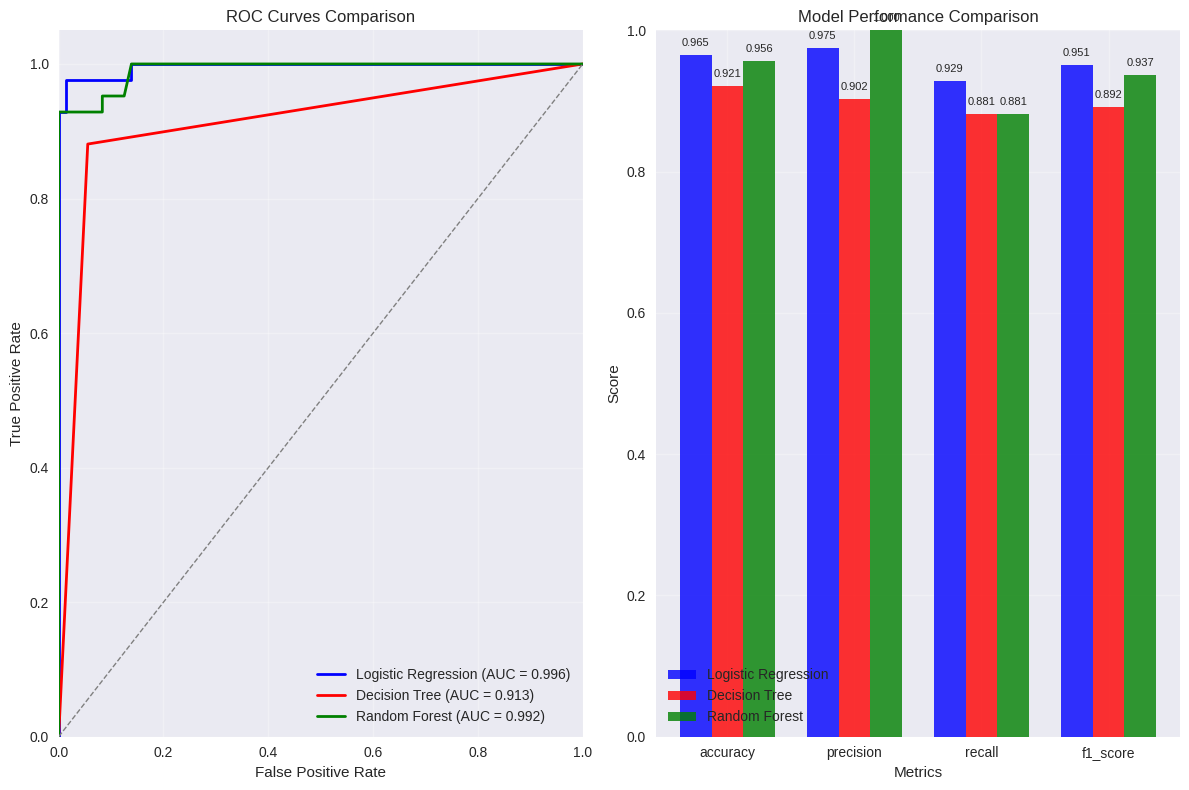

In [11]:
plt.figure(figsize=(12, 8))

# Plot ROC curve untuk setiap model
colors = ['blue', 'red', 'green']
plt.subplot(1, 2, 1)

for i, (name, results) in enumerate(evaluation_results.items()):
    # Hitung ROC curve
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    auc_score = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {auc_score:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot perbandingan metrik
plt.subplot(1, 2, 2)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(metrics))
width = 0.25

for i, (name, results) in enumerate(evaluation_results.items()):
    values = [results[metric] for metric in metrics]
    plt.bar(x + i * width, values, width, label=name, color=colors[i], alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim([0, 1])
plt.grid(True, alpha=0.3)

# Tambahkan nilai pada bar
for i, (name, results) in enumerate(evaluation_results.items()):
    values = [results[metric] for metric in metrics]
    for j, v in enumerate(values):
        plt.text(j + i * width, v + 0.01, f'{v:.3f}', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Terakhir, kita akan melihat **ROC Curve (Receiver Operating Characteristic Curve)** yang merupakan visualisasi penting untuk mengevaluasi kinerja model klasifikasi biner, terutama dalam membedakan antar kelas. Selain itu, kita juga akan melihat ringkasan visual dari metrik performa model yang telah kita hitung sebelumnya.

**1. ROC Curves Comparison (Kiri)**

* **Apa itu ROC Curve?** ROC Curve menggambarkan kemampuan model dalam membedakan antara kelas positif dan negatif pada berbagai *threshold* klasifikasi. Semakin tinggi dan ke kiri atas kurva, semakin baik model tersebut.
* **Area Under the Curve (AUC):** AUC mengukur keseluruhan kualitas diskriminasi model. Nilai AUC berkisar dari 0 hingga 1; semakin dekat ke 1, semakin baik modelnya.
    * **Logistic Regression (AUC = 0.996):** Kurva berwarna biru untuk *Logistic Regression* berada paling dekat dengan sudut kiri atas, dan memiliki nilai AUC tertinggi yaitu **0.996**. Ini menunjukkan bahwa *Logistic Regression* memiliki kemampuan diskriminasi yang luar biasa dalam membedakan antara diagnosis Benign dan Malignant.
    * **Random Forest (AUC = 0.992):** Kurva berwarna hijau untuk *Random Forest* juga sangat tinggi, dengan nilai AUC **0.992**. Ini menunjukkan performa yang sangat mirip dan sangat baik dengan *Logistic Regression*.
    * **Decision Tree (AUC = 0.913):** Kurva berwarna merah untuk *Decision Tree* berada di bawah kedua model lainnya, dengan nilai AUC **0.913**. Meskipun masih tergolong baik (lebih tinggi dari garis diagonal), ini mengonfirmasi bahwa *Decision Tree* memiliki kemampuan diskriminasi yang paling lemah di antara ketiga model.

**Interpretasi Singkat ROC:** Baik *Logistic Regression* maupun *Random Forest* menunjukkan kemampuan diskriminasi yang sangat superior, mampu membedakan kelas Benign dan Malignant dengan sangat efektif. *Logistic Regression* sedikit lebih unggul dengan AUC tertinggi.

**2. Model Performance Comparison (Kanan)**

* Grafik batang ini menyajikan perbandingan visual dari metrik `accuracy`, `precision`, `recall`, dan `f1_score` untuk ketiga model kita pada data *testing*.
* **Akurasi:**
    * *Logistic Regression* (`0.965`) sedikit lebih tinggi dari *Random Forest* (`0.956`).
    * *Decision Tree* (`0.921`) adalah yang terendah.
* **Precision:**
    * *Random Forest* mencapai `1.000` (sempurna), mengkonfirmasi hasil *confusion matrix* bahwa tidak ada *False Positives* dari model ini.
    * *Logistic Regression* juga sangat tinggi (`0.975`).
    * *Decision Tree* lebih rendah (`0.902`).
* **Recall:**
    * *Logistic Regression* memiliki `0.929` (tertinggi).
    * *Random Forest* dan *Decision Tree* memiliki nilai yang sama (`0.881`). Ini menegaskan bahwa *Logistic Regression* lebih baik dalam menangkap semua kasus Malignant yang sebenarnya.
* **F1-Score:**
    * *Logistic Regression* (`0.951`) menunjukkan keseimbangan terbaik antara *Precision* dan *Recall*.
    * *Random Forest* (`0.937`) juga sangat baik, didorong oleh *Precision* yang sempurna.
    * *Decision Tree* (`0.892`) adalah yang terendah.

---

## **Kesimpulan Umum:**

Visualisasi ini semakin memperkuat temuan kita dari evaluasi sebelumnya.
* **Logistic Regression** secara konsisten menunjukkan performa yang sangat kuat dan seimbang di seluruh metrik, dengan AUC dan *Recall* tertinggi, menjadikannya pilihan yang sangat solid.
* **Random Forest** juga memiliki performa yang sangat baik, terutama dengan *Precision* yang sempurna (tidak ada *False Positives*), yang bisa menjadi keuntungan besar dalam konteks medis. Namun, *Recall*-nya sedikit lebih rendah dari *Logistic Regression*.
* **Decision Tree** tertinggal dari kedua model lainnya di semua metrik, menegaskan bahwa model ini kurang efektif dalam menggeneralisasi ke data baru.

Berdasarkan analisis komprehensif ini, **Logistic Regression dan Random Forest adalah model-model yang paling menjanjikan** untuk tugas klasifikasi diagnosis kanker payudara ini.